In [1]:
# Import libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, 

# Libraries for data visualization
import matplotlib.pyplot as plt  
import seaborn as sns 
from pandas.plotting import scatter_matrix

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 
#Linear Modeal From scikit_learn
from sklearn import linear_model

# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# import the metrics class
#from sklearn import metrics
import sklearn.metrics as sm
# import stats for accuracy 
# import statsmodels.api as sm


In [2]:
#importing csv into a pandas dataframe
salary_dataset = pd.read_csv('/Users/nay/Desktop/Development/Data_Analyst/Indeed_Salary_By_Location/Saved_Searches_CSV/Creative%20Director_in_New%20York%20City_Los%20Angeles_Houston.csv')
#printing Data Frame
salary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   position        147 non-null    object 
 1   input Position  147 non-null    object 
 2   company         147 non-null    object 
 3   location        147 non-null    object 
 4   input City      147 non-null    object 
 5   salary          147 non-null    float64
dtypes: float64(1), object(5)
memory usage: 7.0+ KB


In [3]:
#Checking If There Are Special Characters in The Data
salary_dataset.isin(['$']).sum(axis=0)

position          0
input Position    0
company           0
location          0
input City        0
salary            0
dtype: int64

In [4]:
#Avoid Noisy Features By Checking The Unique Values For Each Column

for c in salary_dataset.columns: #looping through dataset
    print("---- %s ---" % c) #printing current column name
    print(salary_dataset[c].value_counts()) #Using .value_counts() function which returns the count of unique values

---- position ---
Creative Director                                                  48
Associate Creative Director                                        11
Metaverse Creative Director                                         5
Sr. Director Solutions Design                                       4
Associate Creative Director (Freelance) - Remote                    4
Associate Director, Social Creative, GQ Sports                      3
Director, Creative Advertising                                      3
Director, Creative Services (Graphic Designer)                      3
Associate Creative Director, Social Creative (Freeform)             3
Director, eCommerce Creative – Def Jam                              3
Creative Director (Remote)                                          3
Creative Director, FX Networks                                      3
Executive Creative Director                                         3
Director, Creative Marketing                                        3
Br

In [5]:
#Feature Mapping Income By Range
#salary_dataset['salary'] = salary_dataset['salary'].map({})

#Find Minimum and Maximum
salary_dataset['salary'].min()
salary_dataset['salary'].max()

216.5

In [6]:
#Setting Salary To Quantitative Feautures Based On Range
salary_dataset.loc[(salary_dataset['salary'] >= 50.0) & (salary_dataset['salary'] <= 79.99), 'salary'] = 0
salary_dataset.loc[(salary_dataset['salary'] >= 80.0) & (salary_dataset['salary'] <= 99.99), 'salary'] = 1
salary_dataset.loc[(salary_dataset['salary'] >= 100.0) & (salary_dataset['salary'] <= 119.99), 'salary'] = 2
salary_dataset.loc[(salary_dataset['salary'] >= 120.0) & (salary_dataset['salary'] <= 149.99), 'salary'] = 3
salary_dataset.loc[(salary_dataset['salary'] >= 150.0) & (salary_dataset['salary'] <= 179.99), 'salary'] = 4
salary_dataset.loc[(salary_dataset['salary'] >= 180.0) & (salary_dataset['salary'] <= 199.99), 'salary'] = 5
salary_dataset.loc[(salary_dataset['salary'] >= 200.0), 'salary'] = 6

In [7]:
#Checking If Salary Variables Where Updated
salary_dataset['salary'].value_counts()

2.0    50
3.0    39
1.0    22
4.0    15
0.0     8
5.0     7
6.0     6
Name: salary, dtype: int64

In [8]:
salary_dataset['input City'].value_counts()

Los Angeles      70
New York City    53
Houston          24
Name: input City, dtype: int64

In [9]:
#Setting input City To Quantitative Value
salary_dataset.loc[(salary_dataset['input City'] == 'Los Angeles'), 'input City'] = 0
salary_dataset.loc[(salary_dataset['input City'] == 'New York City'), 'input City'] = 1
salary_dataset.loc[(salary_dataset['input City'] == 'Houston'), 'input City'] = 2

In [10]:
salary_dataset['input City'].value_counts()

0    70
1    53
2    24
Name: input City, dtype: int64

In [11]:
#Dropping All Unecessary Columns Of Data
salary_dataset.drop(['position', 'location', 'company', 'input Position'], axis=1, inplace=True)

In [12]:
salary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   input City  147 non-null    object 
 1   salary      147 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [13]:
for c in salary_dataset.columns: #looping through dataset
    print("---- %s ---" % c) #printing current column name
    print(salary_dataset[c].value_counts())

---- input City ---
0    70
1    53
2    24
Name: input City, dtype: int64
---- salary ---
2.0    50
3.0    39
1.0    22
4.0    15
0.0     8
5.0     7
6.0     6
Name: salary, dtype: int64


In [14]:
salary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   input City  147 non-null    object 
 1   salary      147 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [15]:
#Converting Salary Column To Int
display(salary_dataset.dtypes)

salary_dataset['salary'] = salary_dataset['salary'].astype(int)

display(salary_dataset.dtypes)


input City     object
salary        float64
dtype: object

input City    object
salary         int64
dtype: object

In [16]:
salary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   input City  147 non-null    object
 1   salary      147 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [17]:
#Converting Input City Column To Int
display(salary_dataset.dtypes)

salary_dataset['input City'] = salary_dataset['input City'].astype(int)

display(salary_dataset.dtypes)

input City    object
salary         int64
dtype: object

input City    int64
salary        int64
dtype: object

In [18]:
print(salary_dataset)

     input City  salary
0             1       1
1             1       1
2             1       1
3             1       3
4             1       2
..          ...     ...
142           2       1
143           2       2
144           2       3
145           2       2
146           2       2

[147 rows x 2 columns]


<AxesSubplot:xlabel='input City'>

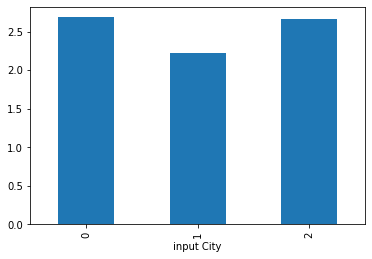

In [19]:
#Visualing Data With Bar Graphs
#Plotting a Bar Graph For input City against Salary To See The Corelation
salary_dataset.groupby('input City').salary.mean().plot(kind='bar')

In [20]:
#Renaming Input City So It Has No Spaces
salary_dataset.rename(columns= {'input City':'city'}, inplace=True)

In [21]:
salary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   city    147 non-null    int64
 1   salary  147 non-null    int64
dtypes: int64(2)
memory usage: 2.4 KB


In [22]:
#Setting Indendent and Dependent Vairables
X = salary_dataset['city']
y = salary_dataset['salary']

In [23]:
#Randomly split our data into a training and test set
#Set apart 30% of the entire dataset as the test set and assign the training set and test set into four variables, respectively.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [24]:
#Python scikit-learn only accepts the training and test data in a 2-dimensional array format. 
#We have to perform data transformation on our training set and test set.

#Use Numpy reshape function to transform the training/test set from 1-dimensional series to a 2-dimensional array.

X_train = np.array(X_train).reshape((len(X_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))

X_test = np.array(X_test).reshape(len(X_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)


In [25]:
#Train Model
#Use the Scikit-Learn LinearRegression function to create a model object.
model = linear_model.LinearRegression()
#Fit the training set to the model.
model.fit(X_train, y_train)


LinearRegression()

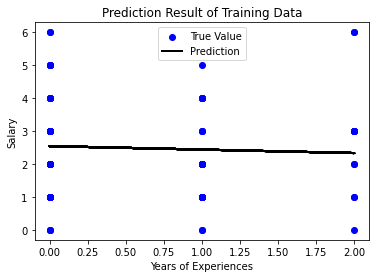

In [26]:
#we have trained a linear model and we first use it to predict the salary on our training set to see how well it fit on the data.

y_train_pred = model.predict(X_train)

plt.figure()
plt.scatter(X_train, y_train, color='blue', label="True Value")
plt.plot(X_train, y_train_pred, color='black', linewidth=2, label="Prediction")
plt.xlabel("Years of Experiences")
plt.ylabel("Salary")
plt.title('Prediction Result of Training Data')
plt.legend()
plt.show()


In [22]:
#Independent Variable
salary_dataset_x = pd.DataFrame(salary_dataset.city)

#Dependent Variable
salary_dataset_y = pd.DataFrame(salary_dataset.salary)

In [23]:
#Initialize Linear Regression Model
reg = LogisticRegression()

#Split Data Into 77% Training and 33% Testing - For Both The Independent(x) and Dependent(y or salary)
x_train, x_test, y_train, y_test = train_test_split(salary_dataset_x, salary_dataset_y, test_size=0.33, random_state=42)

#test_size=0.33 creates a test data set with 33% of the data we have and the remaining 77% percent will be our training set to train our model. 
#This split function returns us a pair of the train set (x_train,y_train) and a pair of the test set (x_test,y_test).

In [24]:
#changing to 1d array


In [25]:
#Train Model With Training Data
reg.fit(x_train, y_train.values.ravel())

#Print Price Predictions On Our Test Data
y_predict = reg.predict(x_test)

In [26]:
#Predict Salary Range Based On City
#reg.predict([[0]]) 

In [27]:
#Printing The Accuracy Of The Test - Comparing Y Test To Y Train
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.3469387755102041
